In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv("KAG_conversion_data_raw.csv")
df.head()
df.shape

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


(1143, 11)

In [5]:
#checking and finding missing values (if present)
df.info()
df.isnull().sum()
#after seeing the results, we conculded that there is no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe() 
#in pandas generates summary statistics (count, mean, std, min, quartiles, max) for numerical columns of a DataFrame.

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,987261.13,1067.38,133783.99,32.77,186732.13,33.39,51.36,2.86,0.94
std,193992.81,121.63,20500.31,26.95,312762.18,56.89,86.91,4.48,1.74
min,708746.00,916.00,103916.00,2.00,87.00,0.00,0.00,0.00,0.00
25%,777632.50,936.00,115716.00,16.00,6503.50,1.00,1.48,1.00,0.00
50%,1121185.00,1178.00,144549.00,25.00,51509.00,8.00,12.37,1.00,1.00
75%,1121804.50,1178.00,144657.50,31.00,221769.00,37.50,60.02,3.00,1.00
max,1314415.00,1178.00,179982.00,114.00,3052003.00,421.00,639.95,60.00,21.00


##Insights:
- Impressions are highly skewed (most ads < 51k, but max ~3M).
- Clicks are mostly low, median = 8, max = 421.
- Spend shows few high-budget campaigns pushing the mean.
- Conversions and approved conversions are rare, median = 1.

In [7]:
pd.reset_option("display.float_format")

In [8]:
df[((df['Spent'] == 0) & (df['Clicks'] == 0))]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
2,708771,916,103920,30-34,M,20,693,0,0.0,1,0
5,708820,916,103929,30-34,M,29,1915,0,0.0,1,1
10,708979,916,103955,30-34,M,31,1224,0,0.0,1,0
11,709023,916,103962,30-34,M,7,735,0,0.0,1,0
12,709038,916,103965,30-34,M,16,5117,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
719,1121477,1178,144603,40-44,M,21,7073,0,0.0,1,0
851,1121791,1178,144655,30-34,F,23,6838,0,0.0,1,0
880,1121846,1178,144664,30-34,F,32,8350,0,0.0,1,0
882,1121854,1178,144666,30-34,F,63,8587,0,0.0,1,0


- It was observed that some entries (207 entries) had both 'Spent' and 'Clicks' equal to 0. This is illogical for campaign performance analysis because if no money was spent and no users clicked, the record does not contribute any value to understanding ROI, CTR, or CPA. Therefore, these entries were removed, and our final dataset now consists of 936 entries.

In [9]:
df = df[~((df['Spent'] == 0) & (df['Clicks'] == 0))]
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [10]:
#finding key
(df.groupby('ad_id').size()>1).sum() == 0
#ad_id is primary key , that means uniquely identifies each row

True

# Overall Campaign Performance

In [12]:
#Aggregate Metrics:
total_impressions = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
total_spent = df['Spent'].sum()
total_leads = df['Total_Conversion'].sum()
total_approved = df['Approved_Conversion'].sum()

#Derived KPI's:
ctr = (total_clicks/total_impressions) * 100 #Click Through Rate : Tells how engaging your ad is, higher CTR: ad is relevant to audience
cvr = (total_approved/total_clicks) * 100 #Conversion Rate: Show how many clicks actually led to business results.
cpm = (total_spent/total_impressions) * 1000 #Cost Per Mille: It’s the advertising cost per 1,000 impressions
cpl = (total_spent/total_leads) #Cost Per Lead: Measure efficiency in terms of cost of getting lead.
cpa = (total_spent/total_approved) #Cost Per Approved Conversion: A stricter metric showing True ROI measure.

print("CTR (%):", round(ctr, 2))
print("CVR (%):", round(cvr, 2))
print("CPM:", round(cpm, 2))
print("CPL:", round(cpl, 2))
print("CPA:", round(cpa, 2))

CTR (%): 0.02
CVR (%): 2.63
CPM: 0.28
CPL: 19.24
CPA: 58.53


###### Insights from Overall Campaign Performance :

- **CTR (%): 0.02% (Extremely Low)** : This means that only 2 out of every 10,000 people who see the ad are clicking. Ad creatives are not engaging (poor headlines, visuals, or targeting not matching audience interests)
- **CVR (%): 2.63% (Moderate but acceptable)** : Once users click, about 2.63% of them end up purchasing (approved conversion), Landing pages & conversion funnel seem reasonably effective — problem is not enough clicks are coming in.
- **CPM (Cost per Mille/1,000 impressions): 0.28 USD (Very Low)** : It costs just 0.28 USD to reach 1,000 people.This shows ads are very cheap to display (low competition, good relevance score, or efficient bidding).
- **CPL (Cost per Lead): 19.24 USD (High)** : Every enquiry/lead costs around 19.24 USD. Ads are not generating leads cost-effectively — again pointing towards poor CTR inflating acquisition costs.
- **CPA (Cost per Acquisition): 58.53 USD (Very High)** : Each actual purchase costs 58.53 USD in advertising spend. Unless the product’s profit margin is much higher than 58.43 USD, this campaign may not be profitable. ROI is likely negative or break-even at best unless the product has a very high margin or LTV (lifetime value)


# Audience Demographics Analysis

### Performance by age group

In [13]:
#Aggregating by age
age_group = df.groupby('age').agg({'Impressions':'sum','Clicks':'sum','Spent':'sum','Total_Conversion':'sum','Approved_Conversion':'sum'})
age_group.reset_index(inplace = True)
age_group

,age,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,67674431,9483,15252.399986,1307,443
1,35-39,42021238,7094,11112.429994,591,199
2,40-44,39551158,7736,11589.729981,499,162
3,45-49,63699120,13852,20750.669997,655,199


In [14]:
#Add KPI's
age_group['CTR'] = (age_group['Clicks']/age_group['Impressions']) * 100
age_group['CVR'] = (age_group['Approved_Conversion']/age_group['Clicks']) * 100
age_group['CPM'] = (age_group['Spent']/age_group['Impressions']) * 1000
age_group['CPL'] = (age_group['Spent']/age_group['Total_Conversion'])
age_group['CPA'] = (age_group['Spent']/age_group['Approved_Conversion'])
age_group

,age,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CVR,CPM,CPL,CPA
0,30-34,67674431,9483,15252.399986,1307,443,0.014013,4.671517,0.225379,11.669778,34.429797
1,35-39,42021238,7094,11112.429994,591,199,0.016882,2.805187,0.264448,18.802758,55.841357
2,40-44,39551158,7736,11589.729981,499,162,0.019559,2.094105,0.293031,23.225912,71.541543
3,45-49,63699120,13852,20750.669997,655,199,0.021746,1.436616,0.325761,31.680412,104.274724


In [34]:
age_group.to_clipboard()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='CPA'>

Text(0.5, 1.0, 'Cost per Acquisition by Age Group')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='CVR'>

Text(0.5, 1.0, 'Conversion Rate by Age Group')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='CTR'>

Text(0.5, 1.0, 'Click-Through Rate by Age Group')

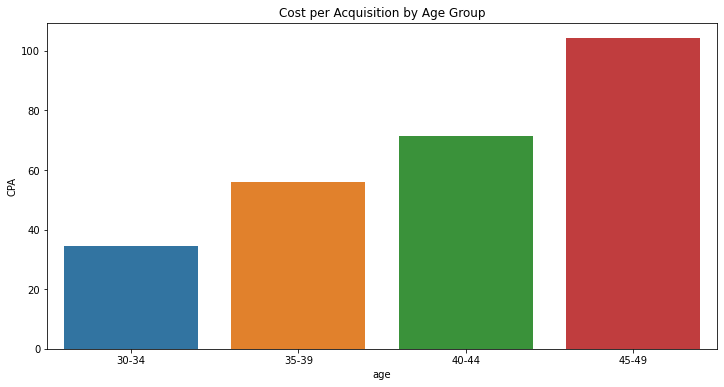

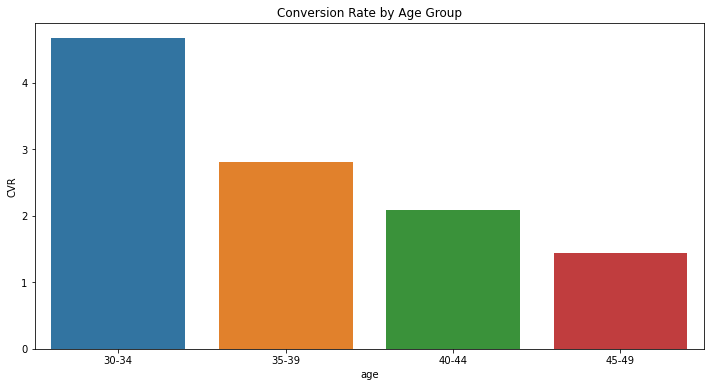

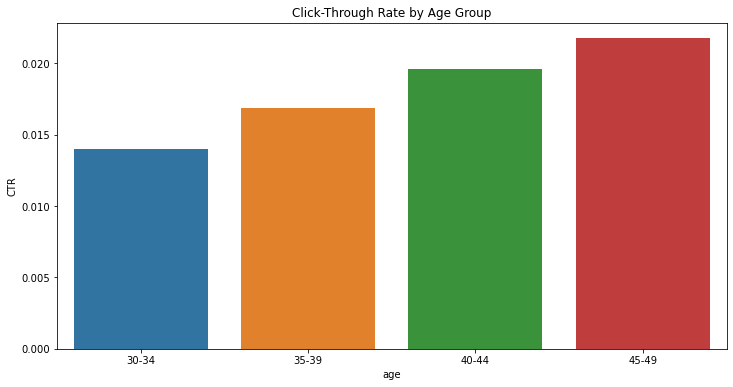

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(data = age_group, x = 'age', y = 'CPA')
plt.title("Cost per Acquisition by Age Group")

plt.figure(figsize = (12,6))
sns.barplot(data = age_group, x = 'age', y = 'CVR')
plt.title("Conversion Rate by Age Group")

plt.figure(figsize = (12,6))
sns.barplot(data = age_group, x = 'age', y = 'CTR')
plt.title("Click-Through Rate by Age Group")


Insights from age_group:
- 30–34: Best-performing group → highest conversions, lowest CPA (~34).
- 35–39: Moderate clicks, weak conversions, high CPA (~56).
- 40–44: Good CTR, but very low conversions, CPA (~72).
- 45–49: Highest spend & clicks, but worst ROI, CPA (~104).

Age Wise Business Interpretation:
- **30–34 segment is the sweet spot**: Balanced CTR, strong CVR, lowest CPL/CPA.
- Older groups (40–49) → higher engagement (clicks) but poor conversions → wasted budget.
- 35–39 is middle-ground: better than older, but less efficient than 30–34.

Recommendations:
- Increase spend on 30–34 (strong ROI).
- Optimize campaigns for 35–44 (test creatives/landing pages).
- Cut spend on 45–49 (poor efficiency).
- Use CPA ~34 as benchmark; review any group above ~50.

Key Takeaway:
- Even though older audiences click more (higher CTR), **only the 30–34 age group gives efficient conversions**. The company should **double down on this demographic** for the next campaign.

### Performance by gender

In [25]:
#Aggregating by gender
df_gender = df.groupby('gender').agg({'Impressions':'sum','Clicks':'sum','Spent':'sum','Total_Conversion':'sum','Approved_Conversion':'sum'})
df_gender.reset_index(inplace = True)
df_gender

,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,F,114707607,23878,34502.619963,1557,467
1,M,98238340,14287,24202.609995,1495,536


In [26]:
#Add KPI's
df_gender['CTR'] = (df_gender['Clicks']/df_gender['Impressions']) * 100
df_gender['CVR'] = (df_gender['Approved_Conversion']/df_gender['Clicks']) * 100
df_gender['CPM'] = (df_gender['Spent']/df_gender['Impressions']) * 1000
df_gender['CPL'] = (df_gender['Spent']/df_gender['Total_Conversion'])
df_gender['CPA'] = (df_gender['Spent']/df_gender['Approved_Conversion'])
df_gender

,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CVR,CPM,CPL,CPA
0,F,114707607,23878,34502.619963,1557,467,0.020816,1.955775,0.300788,22.159679,73.881413
1,M,98238340,14287,24202.609995,1495,536,0.014543,3.751662,0.246366,16.189037,45.154123


<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='CPA'>

Text(0.5, 1.0, 'Cost Per Approved Conversion by gender')

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='CVR'>

Text(0.5, 1.0, 'Conversion Rate by gender')

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='CTR'>

Text(0.5, 1.0, 'Click-Through Rate by gender')

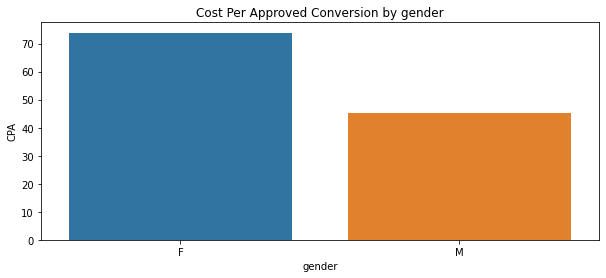

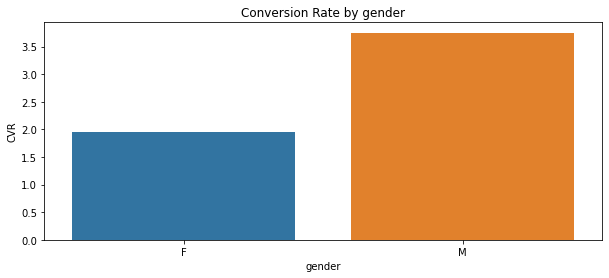

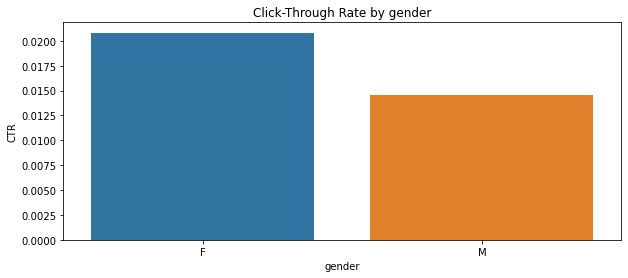

In [32]:
plt.figure(figsize = (10,4))
sns.barplot(data = df_gender, x = 'gender', y = 'CPA')
plt.title("Cost Per Approved Conversion by gender")

plt.figure(figsize = (10,4))
sns.barplot(data = df_gender, x = 'gender', y = 'CVR')
plt.title("Conversion Rate by gender")

plt.figure(figsize = (10,4))
sns.barplot(data = df_gender, x = 'gender', y = 'CTR')
plt.title("Click-Through Rate by gender")

In [38]:
df_gender.to_clipboard()

Insights from age_group:
- **CTR (Click-Through Rate)** : Higher for Females (0.020%) vs Males (0.014%), Women click more often on ads.
- **CVR (Conversion Rate from Clicks → Purchases)** : Much higher for **Males (3.75%)** vs Females (1.95%), Male clicks are **higher quality**, more likely to convert.
- **CPL (Cost per Lead)** : Lower for Males (16.18 USD) compared to Females (22.15 USD), It’s cheaper to generate enquiries from Males.
- **CPA (Cost per Acquisition)** : Males: 45.14 USD → **better ROI**, Females: 73.88 USD → significantly less efficient.

Gender Wise Business Interpretation:
- Women **engage more (click more)** but they don’t convert as efficiently.
- Men **engage less (fewer clicks)** but those who click are more serious buyers → cheaper acquisitions.
- Overall, **male campaigns give a stronger ROI** (lower CPA, lower CPL, higher CVR).

Recommendations:
- **Budget Allocation** : Shift more budget toward male audiences (since CPA is ~45 vs ~74 for females), Keep female campaigns smaller / optimized - unless product is female-oriented, where awareness might still be valuable.
- **Creative Optimization** : Since females click but don’t convert, test different creatives tailored to women (e.g., testimonials, product benefits, trust-building messages), For males, maintain current creatives since they are already converting well.
- **Funnel Improvement** : For female segment → focus on checkout flow & retargeting (maybe they drop off later in funnel), For male segment → scale spend confidently to maximize ROI.

Key Takeaway:
- Male audience is more cost-efficient (better CVR, lower CPA). But since females generate higher top-of-funnel engagement, the strategy should be: Use female campaigns for awareness & engagement, Use male campaigns for efficient conversions.

### Performance by age,gender

In [23]:
#Aggregating by age, gender
df_age_gender = df.groupby(['age','gender']).agg({'Impressions':'sum','Clicks':'sum','Spent':'sum','Total_Conversion':'sum','Approved_Conversion':'sum'})
df_age_gender.reset_index(inplace = True)
df_age_gender

,age,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,F,31463353,5099,7611.479995,570,180
1,30-34,M,36211078,4384,7640.919991,737,263
2,35-39,F,21420120,4161,6061.349992,290,90
3,35-39,M,20601118,2933,5051.080003,301,109
4,40-44,F,23386170,5177,7396.579984,310,89
5,40-44,M,16164988,2559,4193.149997,189,73
6,45-49,F,38437964,9441,13433.209993,387,108
7,45-49,M,25261156,4411,7317.460004,268,91


In [24]:
#Add KPI's
df_age_gender['CTR'] = (df_age_gender['Clicks']/df_age_gender['Impressions']) * 100
df_age_gender['CVR'] = (df_age_gender['Approved_Conversion']/df_age_gender['Clicks']) * 100
df_age_gender['CPM'] = (df_age_gender['Spent']/df_age_gender['Impressions']) * 1000
df_age_gender['CPL'] = (df_age_gender['Spent']/df_age_gender['Total_Conversion'])
df_age_gender['CPA'] = (df_age_gender['Spent']/df_age_gender['Approved_Conversion'])
df_age_gender

,age,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CVR,CPM,CPL,CPA
0,30-34,F,31463353,5099,7611.479995,570,180,0.016206,3.530104,0.241916,13.353474,42.286000
1,30-34,M,36211078,4384,7640.919991,737,263,0.012107,5.999088,0.211011,10.367598,29.052928
2,35-39,F,21420120,4161,6061.349992,290,90,0.019426,2.162942,0.282975,20.901207,67.348333
3,35-39,M,20601118,2933,5051.080003,301,109,0.014237,3.716331,0.245185,16.780997,46.340184
4,40-44,F,23386170,5177,7396.579984,310,89,0.022137,1.719142,0.316280,23.859935,83.107640
5,40-44,M,16164988,2559,4193.149997,189,73,0.015831,2.852677,0.259397,22.185979,57.440411
6,45-49,F,38437964,9441,13433.209993,387,108,0.024562,1.143947,0.349478,34.711137,124.381574
7,45-49,M,25261156,4411,7317.460004,268,91,0.017462,2.063024,0.289672,27.303955,80.411648


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='CPA'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='age'>

Text(0.5, 1.0, 'CPA Heatmap by Age & Gender')

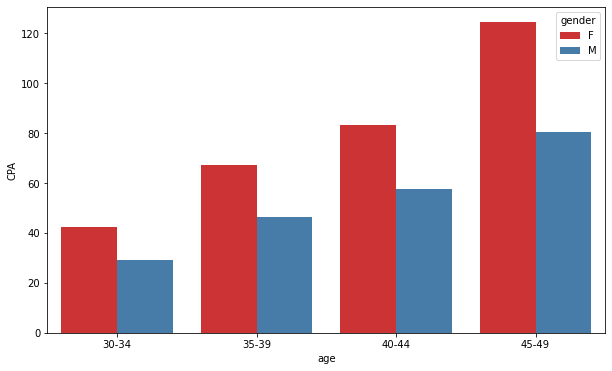

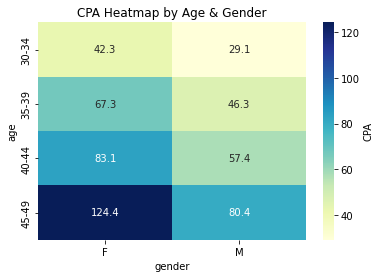

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x="age", y="CPA", hue="gender", data=df_age_gender, palette="Set1")


pivot_table = df_age_gender.pivot(index="age", columns="gender", values="CPA")
plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'CPA'})
plt.title("CPA Heatmap by Age & Gender")

Insights from combining age_group:
- **Clear Winner Segment** : **Males 30–34** -> Highest CVR (5.99%), Lowest CPL (10.36 USD), Lowest CPA (29.05 USD), This is the golden segment – most efficient ROI.

- **Balanced Segment** : Females 30–34 also do well (CPA = 42.28 USD, CVR = 3.53%), Good secondary focus group.

- **Declining Efficiency with Age** : Both genders 35+ see CPA climb drastically, Especially Females 45–49 → worst-performing (CPA ~ 124USD).

- **CTR vs CVR Paradox** : Older females (40–49) click higher, but don’t convert (CVR <2%).

Recommendations:
- **Budget Allocation** : Allocate maximum budget to Males 30–34, Secondary focus: Females 30–34, Scale back drastically on Females 40–49 (poor ROI).
- **Creative Optimization** : For younger audiences (30–34) → maintain current creatives (working well), For older audiences → if brand must target them, reframe creatives: Trust-building, social proof, detailed benefits, Or run them only as awareness campaigns.

Key Takeaway:
- **30–34 Males** are your **star performers** (best ROI), followed by 30–34 Females.
- Older segments (40–49 Females especially) drain budget without returns.

### Performance by campaign (xyz_campaign_id)

In [44]:
df_campaign = df.groupby('xyz_campaign_id').agg({'Impressions':'sum','Clicks':'sum','Spent':'sum','Total_Conversion':'sum','Approved_Conversion':'sum','ad_id':'count'})
df_campaign.rename(columns = {'ad_id':'no_of_ads'}, inplace = True)
df_campaign.reset_index(inplace = True)
df_campaign

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,no_of_ads
0,916,448046,113,149.710001,39,16,35
1,936,7797942,1984,2893.369999,356,118,288
2,1178,204699959,36068,55662.149959,2657,869,613


In [45]:
df_campaign['CTR'] = (df_campaign['Clicks']/df_campaign['Impressions']) * 100
df_campaign['CVR'] = (df_campaign['Approved_Conversion']/df_campaign['Clicks']) * 100
df_campaign['CPM'] = (df_campaign['Spent']/df_campaign['Impressions']) * 1000
df_campaign['CPL'] = (df_campaign['Spent']/df_campaign['Total_Conversion'])
df_campaign['CPA'] = (df_campaign['Spent']/df_campaign['Approved_Conversion'])
df_campaign

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,no_of_ads,CTR,CVR,CPM,CPL,CPA
0,916,448046,113,149.710001,39,16,35,0.025221,14.159292,0.334140,3.838718,9.356875
1,936,7797942,1984,2893.369999,356,118,288,0.025443,5.947581,0.371043,8.127444,24.520085
2,1178,204699959,36068,55662.149959,2657,869,613,0.017620,2.409338,0.271921,20.949247,64.053107


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='CPA'>

Text(0.5, 1.0, 'Cost Per Approved Conversion by campaign')

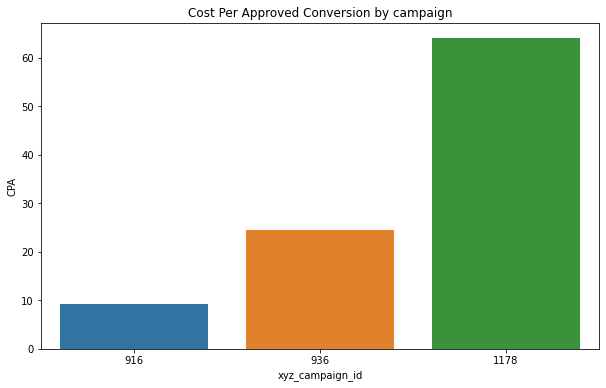

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_campaign, x = 'xyz_campaign_id', y = 'CPA')
plt.title("Cost Per Approved Conversion by campaign")

Insights from combining age_group:
- **Campaign 916 (Best Performer)** : 
    Highest efficiency with CPA = 9.35 USD and CPL = 3.83 USD, far lower than other campaigns. 
    Strong conversion rate (CVR = 14.15%), indicating this campaign is reaching the right audience with the right message.
    Even though impressions are low compared to others, it generates high-quality conversions at minimal cost.

- **Campaign 936 (Moderate Performer)** : 
    CPA of 24.52 USD is more than 2.6x higher than Campaign 916 but significantly better than Campaign 1178.
    CTR (0.0254) is the highest among the three, meaning ads are attractive and engaging.
    CVR (5.94%) shows decent conversion efficiency but still much lower than Campaign 916.
    Represents a scalable but less efficient option.

- **Campaign 1178 (Underperformer / Costly)** :
    Despite massive impressions (204M) and highest ad spend (~55K USD), results are inefficient.
    CPA = 64.05 USD, the highest across campaigns, showing poor ROI.
    CTR (0.0176) and CVR (2.4%) are the lowest, meaning both engagement and conversions are weak.
    Suggests audience mis-targeting, weak creatives, or saturation.


### Performance by campaign (fb_campaign_id)

In [53]:
df_fb_campaign = df.groupby(by = 'fb_campaign_id').agg({'Impressions':'sum','Clicks':'sum','Spent':'sum','Total_Conversion':'sum','Approved_Conversion':'sum','ad_id':'count'})

In [54]:
df_fb_campaign['CTR'] = (df_fb_campaign['Clicks']/df_fb_campaign['Impressions']) * 100
df_fb_campaign['CVR'] = (df_fb_campaign['Approved_Conversion']/df_fb_campaign['Clicks']) * 100
df_fb_campaign['CPM'] = (df_fb_campaign['Spent']/df_fb_campaign['Impressions']) * 100
df_fb_campaign['CPL'] = (df_fb_campaign['Spent']/df_fb_campaign['Total_Conversion'])
df_fb_campaign['CPA'] = (df_fb_campaign['Spent']/df_fb_campaign['Approved_Conversion'])

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ad_id,CTR,CVR,CPM,CPL,CPA
fb_campaign_id,,,,,,,,,,,
103916,7350,1,1.430000,2,1,1,0.013605,100.000000,0.019456,0.715000,1.430000
103928,8392,2,2.540000,2,1,2,0.023832,50.000000,0.030267,1.270000,2.540000
103941,10951,1,1.270000,1,1,1,0.009132,100.000000,0.011597,1.270000,1.270000
103968,14669,7,10.280000,1,1,1,0.047720,14.285714,0.070080,10.280000,10.280000
103989,21026,4,4.630000,2,1,1,0.019024,25.000000,0.022020,2.315000,4.630000
...,...,...,...,...,...,...,...,...,...,...,...
179975,877769,160,232.590001,13,4,1,0.018228,2.500000,0.026498,17.891538,58.147500
179976,212508,33,47.690000,4,1,1,0.015529,3.030303,0.022442,11.922500,47.690000
179977,1129773,252,358.189997,13,2,1,0.022305,0.793651,0.031705,27.553077,179.094999


In [55]:
df_fb_campaign = df_fb_campaign[df_fb_campaign['Approved_Conversion']>0]
df_fb_campaign

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ad_id,CTR,CVR,CPM,CPL,CPA
fb_campaign_id,,,,,,,,,,,
103916,7350,1,1.430000,2,1,1,0.013605,100.000000,0.019456,0.715000,1.430000
103928,8392,2,2.540000,2,1,2,0.023832,50.000000,0.030267,1.270000,2.540000
103941,10951,1,1.270000,1,1,1,0.009132,100.000000,0.011597,1.270000,1.270000
103968,14669,7,10.280000,1,1,1,0.047720,14.285714,0.070080,10.280000,10.280000
103989,21026,4,4.630000,2,1,1,0.019024,25.000000,0.022020,2.315000,4.630000
...,...,...,...,...,...,...,...,...,...,...,...
179975,877769,160,232.590001,13,4,1,0.018228,2.500000,0.026498,17.891538,58.147500
179976,212508,33,47.690000,4,1,1,0.015529,3.030303,0.022442,11.922500,47.690000
179977,1129773,252,358.189997,13,2,1,0.022305,0.793651,0.031705,27.553077,179.094999


In [57]:
#Top 10 performing fb_campaign_id by CPA
df_fb_campaign.sort_values(by = "CPA", ascending = True).head(10)

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ad_id,CTR,CVR,CPM,CPL,CPA
fb_campaign_id,,,,,,,,,,,
115615,4333,1,0.18,1,1,1,0.023079,100.0,0.004154,0.180,0.18
115500,3659,1,0.49,1,1,1,0.027330,100.0,0.013392,0.490,0.49
115882,7629,1,0.72,1,1,1,0.013108,100.0,0.009438,0.720,0.72
109788,3010,1,0.86,1,1,1,0.033223,100.0,0.028571,0.860,0.86
110867,2793,1,0.98,1,1,1,0.035804,100.0,0.035088,0.980,0.98
115637,2883,1,0.99,1,1,1,0.034686,100.0,0.034339,0.990,0.99
115677,3029,1,1.05,1,1,1,0.033014,100.0,0.034665,1.050,1.05
104396,3812,1,1.13,2,1,1,0.026233,100.0,0.029643,0.565,1.13
110861,4607,1,1.15,1,1,1,0.021706,100.0,0.024962,1.150,1.15


### Performance by interest

In [33]:
df_interest = df.groupby('interest').agg({'Impressions':'sum','Clicks':'sum','Spent':'sum','Total_Conversion':'sum','Approved_Conversion':'sum','ad_id':'count'})
df_interest.rename(columns = {'ad_id':'no_of_ads'}, inplace = True)
df_interest.reset_index(inplace = True)
df_interest

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,no_of_ads
0,2,1711374,311,503.450005,34,15,19
1,7,2606575,410,648.929999,52,16,17
2,10,17935367,3317,5086.379995,253,83,69
3,15,10712519,1609,2597.259995,182,57,39
4,16,31691480,5144,8084.909990,385,134,116
5,18,8631584,1524,2425.070001,75,31,34
6,19,6081495,1188,1940.359993,93,33,28
7,20,6891466,1234,1960.770001,120,45,39
8,21,2819023,512,824.209999,60,22,25
9,22,3962275,717,1039.859998,48,12,31


In [34]:
df_interest['CTR'] = (df_interest['Clicks']/df_interest['Impressions']) * 100
df_interest['CVR'] = (df_interest['Approved_Conversion']/df_interest['Clicks']) * 100
df_interest['CPM'] = (df_interest['Spent']/df_interest['Impressions']) * 100
df_interest['CPL'] = (df_interest['Spent']/df_interest['Total_Conversion'])
df_interest['CPA'] = (df_interest['Spent']/df_interest['Approved_Conversion'])
df_interest

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,no_of_ads,CTR,CVR,CPM,CPL,CPA
0,2,1711374,311,503.450005,34,15,19,0.018173,4.823151,0.029418,14.807353,33.563334
1,7,2606575,410,648.929999,52,16,17,0.015729,3.902439,0.024896,12.479423,40.558125
2,10,17935367,3317,5086.379995,253,83,69,0.018494,2.502261,0.028359,20.104269,61.281687
3,15,10712519,1609,2597.259995,182,57,39,0.015020,3.542573,0.024245,14.270659,45.565965
4,16,31691480,5144,8084.909990,385,134,116,0.016231,2.604977,0.025511,20.999766,60.335149
5,18,8631584,1524,2425.070001,75,31,34,0.017656,2.034121,0.028095,32.334267,78.228065
6,19,6081495,1188,1940.359993,93,33,28,0.019535,2.777778,0.031906,20.864086,58.798788
7,20,6891466,1234,1960.770001,120,45,39,0.017906,3.646677,0.028452,16.339750,43.572667
8,21,2819023,512,824.209999,60,22,25,0.018162,4.296875,0.029237,13.736833,37.464091
9,22,3962275,717,1039.859998,48,12,31,0.018096,1.673640,0.026244,21.663750,86.655000


In [35]:
#Top 10 performing interest
best_interest = df_interest.sort_values(by = 'CPA')
best_interest.head(10)

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,no_of_ads,CTR,CVR,CPM,CPL,CPA
18,31,1046689,195,299.099999,24,13,17,0.018630,6.666667,0.028576,12.462500,23.007692
20,36,918299,128,205.740000,23,8,15,0.013939,6.250000,0.022404,8.945217,25.717500
26,101,2960453,524,757.689998,71,25,7,0.017700,4.770992,0.025594,10.671690,30.307600
27,102,1160953,150,215.069999,14,7,7,0.012920,4.666667,0.018525,15.362143,30.724286
37,112,2324572,339,483.799999,53,15,7,0.014583,4.424779,0.020812,9.128302,32.253333
0,2,1711374,311,503.450005,34,15,19,0.018173,4.823151,0.029418,14.807353,33.563334
23,65,1733358,372,542.010001,29,16,15,0.021461,4.301075,0.031269,18.690000,33.875625
36,111,1490896,260,370.649998,30,10,6,0.017439,3.846154,0.024861,12.355000,37.065000
8,21,2819023,512,824.209999,60,22,25,0.018162,4.296875,0.029237,13.736833,37.464091
1,7,2606575,410,648.929999,52,16,17,0.015729,3.902439,0.024896,12.479423,40.558125


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='interest', ylabel='CPA'>

Text(0.5, 1.0, 'Cost Per Acquisition by interest')

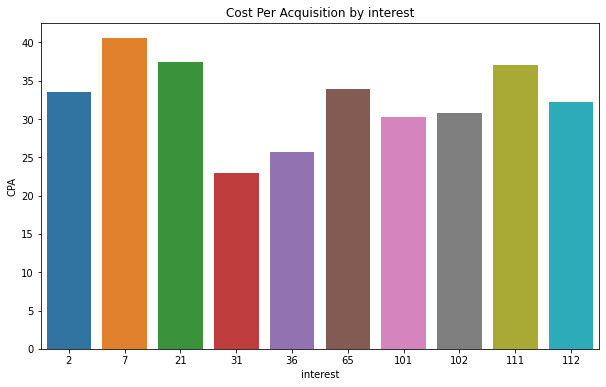

In [37]:
plt.figure(figsize = (10,6))
sns.barplot(data = best_interest.head(10), x = 'interest', y = 'CPA' )
plt.title('Cost Per Acquisition by interest')

#Insights from Interest-wise Analysis:
- **Best performers** : Interests **31 & 36** → lowest CPA (23–25) and strong CVR (6–7%).
- **Good secondary options** : Interests **101 & 102** → CPA ~30–31, decent conversions.

#Recommendation:
- Prioritize budget on Interests 31 & 36 (highest ROI).
- Maintain and optimize top 5 Interests with new creatives/offers.
- Use mid-tier interest for scaling when top interests saturate.
- Keep testing lower interests (65, 111, 21, 7) with smaller budgets/retargeting.

#Future Budget Reallocation Strategy
- Double down on Males, age 30–34, top 5 interests → this combo gives lowest CPA.
- Reduce waste on Females 45–49 and low ROI interests (>70 CPA).
- A/B test creatives for 35–44 group + mid-tier interests to see if CPA can be lowered.
- Monitor CPA trend monthly; reallocate dynamically based on performance shifts.